In [ ]:
!pip install imutils

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import glob
import cv2
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

from imutils.perspective import four_point_transform
from imutils import grab_contours

In [ ]:
IMAGE_TYPE = 'goodlight'
BASE_FOLDER = '/content/gdrive/MyDrive/semanticSegmentation'
INPUT_DIR = f'{BASE_FOLDER}/{IMAGE_TYPE}'

In [ ]:
img_list = glob.glob(f'{INPUT_DIR}/image/*')
img_list.sort()
msk_list = glob.glob(f'{INPUT_DIR}/mask/*')
msk_list.sort()

In [ ]:
IMG_INDEX = 2

img_org = Image.open(img_list[IMG_INDEX]).convert('RGB')
msk_org = Image.open(msk_list[IMG_INDEX]).convert('L')

In [ ]:
  def precrop_element(img, msk):
    img = np.asarray(img)
    msk = np.asarray(msk)
    pts = find_contour(img)
    img = four_point_transform(img, pts)
    msk = four_point_transform(msk, pts)
    img = Image.fromarray(img)
    msk = Image.fromarray(msk)
    return img, msk

  def find_contour(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cnts = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = grab_contours(cnts)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
    screenCnt = None
    for c in cnts:
      peri = cv2.arcLength(c, True)
      approx = cv2.approxPolyDP(c, 0.02 * peri, True)
      if len(approx) == 4:
        screenCnt = approx
        break
    return screenCnt.reshape(4, 2)

img, msk = precrop_element(img_org, msk_org)

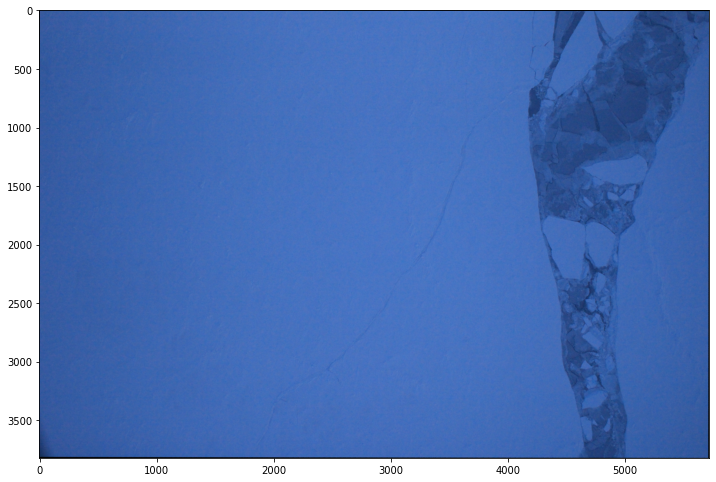

In [ ]:
plt.figure(figsize=(12,16))
plt.imshow(img)

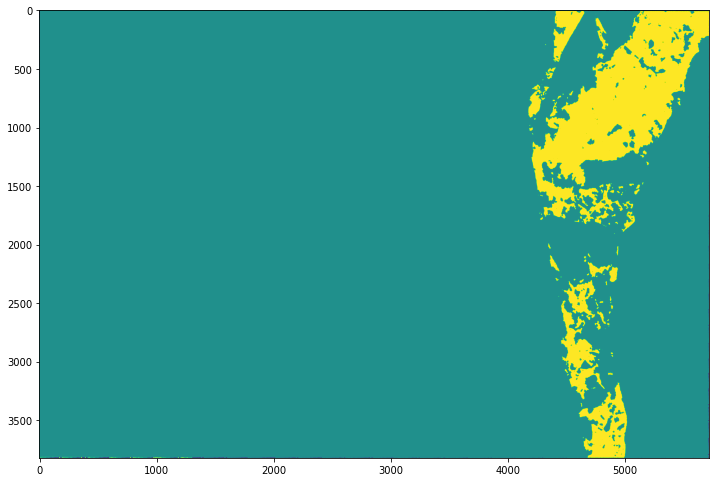

In [ ]:
plt.figure(figsize=(12,16))
plt.imshow(msk)

In [ ]:
def equalize_image(img, clip_limit, grid_size):
    img = np.asarray(img)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    clahe = cv2.createCLAHE(
        clipLimit=clip_limit,
        tileGridSize=grid_size
    )
    lab[...,0] = clahe.apply(lab[...,0])
    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return Image.fromarray(img)

def display_equalization(img, clip_limit, grid_size):
  img_eq = equalize_image(img, clip_limit, grid_size)
  plt.figure(figsize=(12,16))
  plt.imshow(img_eq)

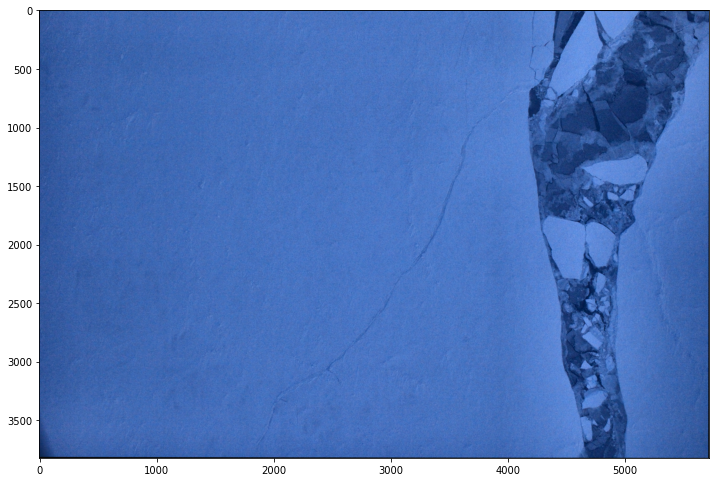

In [ ]:
display_equalization(img, clip_limit=2, grid_size=(8,8))

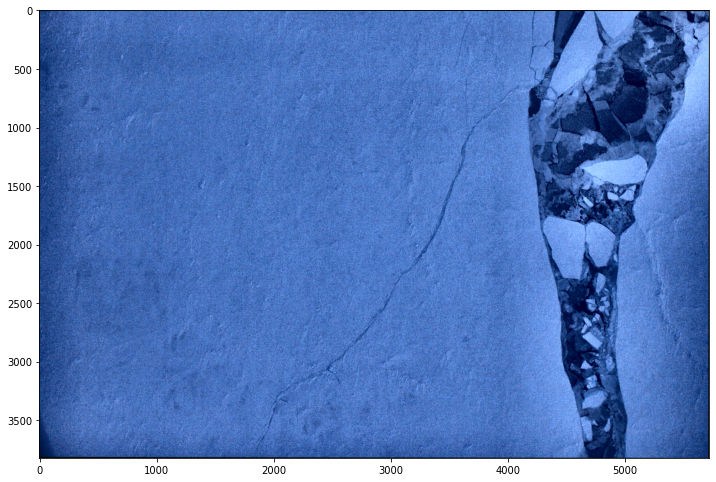

In [ ]:
display_equalization(img, clip_limit=8, grid_size=(8,8))

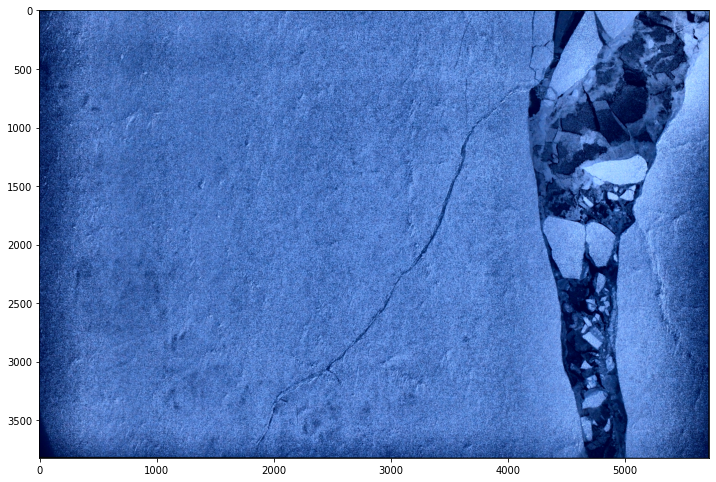

In [ ]:
display_equalization(img, clip_limit=16, grid_size=(8,8))

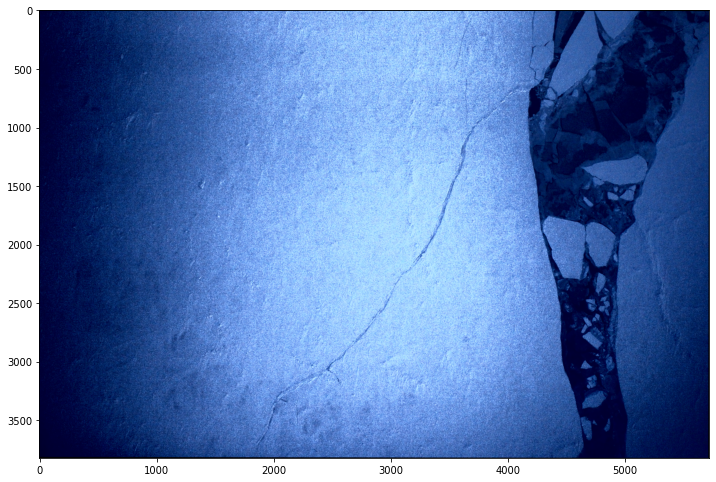

In [ ]:
display_equalization(img, clip_limit=16, grid_size=(2,2))

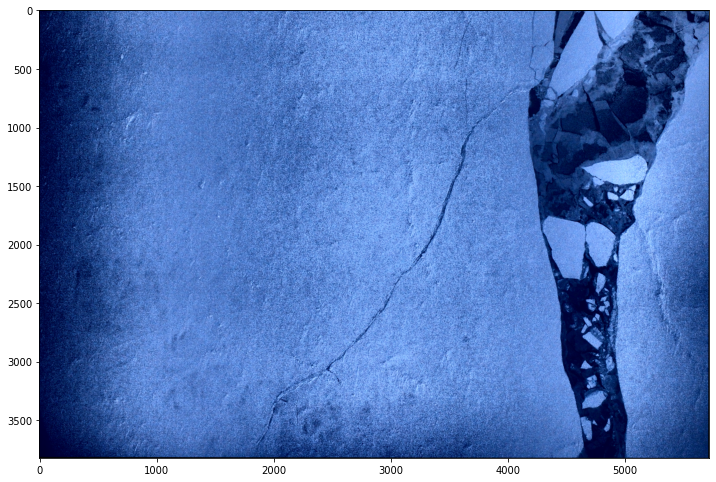

In [ ]:
display_equalization(img, clip_limit=16, grid_size=(4,4))

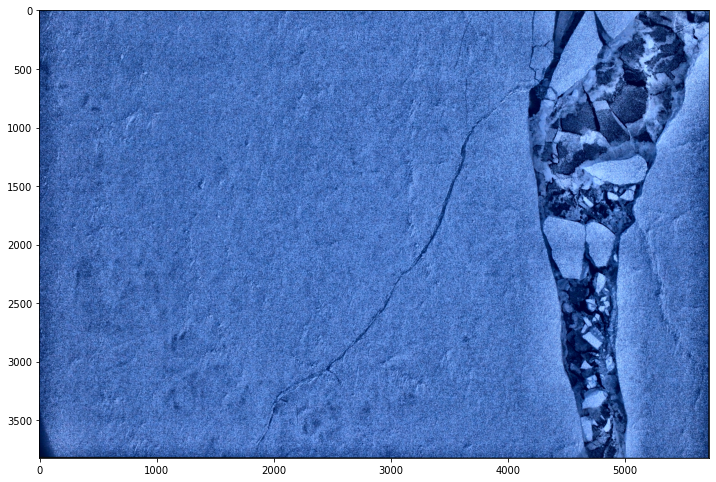

In [ ]:
display_equalization(img, clip_limit=16, grid_size=(16,16))